### NLP METİN İŞLEME ADIMLARI

### Gerekli kütüphaneler

In [1]:
import re
import nltk

import jpype
import string
import unidecode
from typing import List
from nltk.tokenize import word_tokenize
from jpype import JClass, JString, getDefaultJVMPath, shutdownJVM, startJVM, java

C:\Users\golive\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import Mapping, defaultdict


1. Tokenizasyon

In [2]:
ornek_text = '''İnternette değil de, kitapçıda gezerken yapmaktan hoşlandığım bir şey var. 
Rastgele kitapları karıştırmak ve heyecanlandıran, elimden bırakmak istemediğim kitabı alıp gitmek. 
Bu da öyle bir kitaptı benim için. 
Migros'ta gezerken 103. sayfasındaki "Rüyalar ve Yorumları" isimli bölüm başlığını görünce aynı hisse kapıldım ve aldım. 
Ne kadar heyecanla başlamış olsam da çok sevdim diyebileceğim bir kitap olmadı benim için. 
Bunun en büyük sebebi aynı şeylerin sürekli tekrarlandığı hissi vermesiydi. 
Bu sebeple kitabın daha kısa olmasını tercih ederdim. Ama yine de "Bireysel Psikoloji", "Aşağılık ve Üstünlük Kompleksi", 
"Aşk ve Evlilik" kısacası yaşam adına temel şeyleri kavratan ve gözlemler sonucu birilerinin hakkında bu konularda tahmin 
yürütmeyi sağlatan bir kitap olduğunu söylemeden edemeyeceğim. Psikoloji severler, merak edenler deneyebilirler. :)'''

In [5]:
def tokenizasyon(text):
    return word_tokenize(text)

2. Lemmatizer

In [7]:
def lemmatizer(text):
    lemma_words = []
    ZEMBEREK_PATH = 'zemberek-full_old.jar'
    if jpype.isJVMStarted() is False:
        startJVM(getDefaultJVMPath(), '-ea', '-Djava.class.path=%s' % (ZEMBEREK_PATH))
    TurkishMorphology = JClass('zemberek.morphology.TurkishMorphology')
    morphology = TurkishMorphology.createWithDefaults()
    for text in tokenizasyon(text):
        lemma_word = str(morphology.analyzeAndDisambiguate(str(text)).bestAnalysis()[0].getLemmas()[0])
        lemma_words.append(lemma_word)
    return lemma_words
 

3. Stemmer

In [ ]:
def stemmer(text):
    stem_words = []
    ZEMBEREK_PATH = 'zemberek-full_old.jar'
    if jpype.isJVMStarted() is False:
        startJVM(getDefaultJVMPath(), '-ea', '-Djava.class.path=%s' % (ZEMBEREK_PATH))
    TurkishMorphology = JClass('zemberek.morphology.TurkishMorphology')
    morphology = TurkishMorphology.createWithDefaults()
    for text in tokenizasyon(text):
        stem_word = str(morphology.analyzeAndDisambiguate(str(text)).bestAnalysis()[0].getStems()[0])
        stem_words.append(stem_word)
    return stem_words

In [ ]:
stemmer(ornek_text)

Ben bu çalışmada lemmatizer kullacağım.

In [9]:
ornek_text = ' '.join(lemmatizer(ornek_text))

## Gürültü Kaldırma 

In [11]:
ornek_text = re.sub('UNK','',ornek_text)
ornek_text_punc = re.sub('\n','',ornek_text)

Gürültü kaldırma işleminde istemediğim bütün durumları metinden temizlemeliyiz. Mesela lemmatizer işlemi uyguladığım metinde 
'UNK' tagiyle dönüştürülmüş anlamsız bir token var bunu temizleyelim. 

1. Küçük harfe çevirmek

In [12]:
ornek_text_low = ornek_text.lower()

3. Özel karakterlerin kaldırılması

In [ ]:
print(string.punctuation)

In [ ]:
ornek_text_punc

3. Stopwordleri Kaldırma

In [14]:
def remove_stopwords(text):
    stopwords = []
    with open('stopwords.txt', 'r',encoding='utf-8') as f:
        for word in f:
            word = word.split('\n')
            stopwords.append(word[0])
    clean_text = ' '.join(s for s in text.split() if s not in stopwords)
    return clean_text

In [15]:
ornek_text_stop = remove_stopwords(ornek_text_punc)

4. Fazla boşlukların silinmesi

In [17]:
def remove_extra_space(text):
    ornek_text_strip = re.sub(' +', ' ', text)
    return ornek_text_strip.strip()

In [21]:
ornek_text_strip = remove_extra_space(ornek_text_stop)

5. Asciification

In [22]:
def convert_ascii(text):
    text = unidecode.unidecode(text)
    return text

In [23]:
ornek_text_ascii = convert_ascii(ornek_text_strip)

6. Sayıları kaldırmak

In [24]:
def remove_numbers(text):
    text = re.sub(r'\d', '', text)
    return text

In [25]:
ornek_text_number = remove_numbers(ornek_text_ascii)

7. Metin uzunluğu 2'den küçük olan verileri kaldırmak

In [26]:
def remove_less_than_2(text):
    text = ' '.join([w for w in text.split() if len(w)>2])
    return text

In [27]:
ornek_text_2 = remove_less_than_2(ornek_text_number)

Kodun tamamını kullanmak için fonksiyonları birleştirelim.

In [29]:
def remove_noise(text):
    text = ' '.join(lemmatizer(text))
    text = re.sub('UNK','',text)
    text = re.sub('\n','',text)
    text = "".join(d for d in text if d not in string.punctuation)
    text = remove_stopwords(text)
    text = remove_extra_space(text)
    text = convert_ascii(text)
    text = remove_numbers(text)
    text = remove_less_than_2(text)
    return text

In [30]:
ornek_text = remove_noise(ornek_text)

8. URL Kaldırma

In [32]:
def remove_URL(text):
    text = re.sub('https\S+', '', text)
    return text

remove_URL('https://www.google.com/ da her şeyi bulabilirsiniz.')

' da her şeyi bulabilirsiniz.'

9. HTML Taglerini Kaldırılma

In [33]:
def remove_HTML_tags(text):
    html_pattern = r'<.*?>'
    text = re.sub(pattern=html_pattern, repl=' ', string=text)
    return text

remove_HTML_tags('<body> <div> <h2> HTML Taglerini Kaldırmak </h2> </div> </body>')


'      HTML Taglerini Kaldırmak      '

## WordCloud

In [34]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

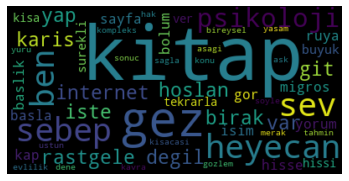

In [36]:
wordcloud = WordCloud().generate(ornek_text_2)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

WordCloud kullanarak genel olarak metinlerin konusu hakkında fikir sahibi olabilirsiniz.